# Experimental Analysis

- [ ] Import dataframe.
- [ ] Function to tally results.
    - [ ] X: p_occ; Y: number of satisfiable runs (for given N).
    - [ ] X: p_occ; Y: average nodes generated (for given N).
- [ ] Function to plot tallied results.
- [ ] Make sure plots make sense.

In [143]:
# IMPORT BOX #
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
# Data Import Box
df = pd.read_csv('experiment_results.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,run,N,p_occ,nodes_generated,SAT
0,0.0,20.0,0.1,10.0,1.0
1,1.0,20.0,0.1,43.0,1.0
2,2.0,20.0,0.1,21.0,1.0
3,3.0,20.0,0.1,3.0,1.0
4,4.0,20.0,0.1,22.0,1.0
...,...,...,...,...,...
5095,5095.0,500.0,0.9,0.0,0.0
5096,5096.0,500.0,0.9,0.0,0.0
5097,5097.0,500.0,0.9,0.0,0.0
5098,5098.0,500.0,0.9,0.0,0.0


In [145]:
print("TESTING TO SEE IF EACH P-OCC IS REPRESENTED")
p_occs = np.linspace(0.1, 0.9, 17)
for p in p_occs:
    print("p: {}; num: {}".format(round(p, 2), len(df[df['p_occ'] == round(p,2)])))

TESTING TO SEE IF EACH P-OCC IS REPRESENTED
p: 0.1; num: 300
p: 0.15; num: 300
p: 0.2; num: 300
p: 0.25; num: 300
p: 0.3; num: 300
p: 0.35; num: 300
p: 0.4; num: 300
p: 0.45; num: 300
p: 0.5; num: 300
p: 0.55; num: 300
p: 0.6; num: 300
p: 0.65; num: 300
p: 0.7; num: 300
p: 0.75; num: 300
p: 0.8; num: 300
p: 0.85; num: 300
p: 0.9; num: 300


In [146]:
print("TESTING TO SEE IF EACH P-OCC IS REPRESENTED")

for N in (20, 100, 500):
    print("N: {}; num: {}".format(N, len(df[df['N'] == N])))

TESTING TO SEE IF EACH P-OCC IS REPRESENTED
N: 20; num: 1700
N: 100; num: 1700
N: 500; num: 1700


In [147]:
def get_sat_vec(dfe, N):
    p_occs = np.linspace(0.1, 0.9, 17)
    
    ret_val = []
    
    for p in p_occs:
        ret_val.append(len(dfe[(dfe['N'] == N) & (dfe['p_occ'] == round(p,2)) & (dfe['SAT'] == 1)] ))
        
    return ret_val

In [148]:
def get_node_vec(dfe, N):
    p_occs = np.linspace(0.1, 0.9, 17)
    
    ret_val = []
    
    for p in p_occs:
        num = len(dfe[(dfe['N'] == N) & (dfe['p_occ'] == round(p,2))])
        total = dfe[ (dfe['N'] == N) & (dfe['p_occ'] == round(p, 2)) ]['nodes_generated'].sum()
        ret_val.append( total/num )
        
    return ret_val

657

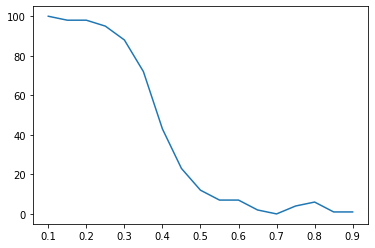

In [149]:
v = get_sat_vec(df, 20)
plt.plot(p_occs, v)
sum(v)

3736.93

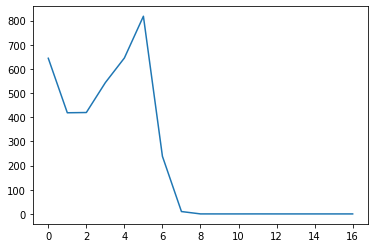

In [150]:
v = get_node_vec(df, 100)
plt.plot(v)
sum(v)

621

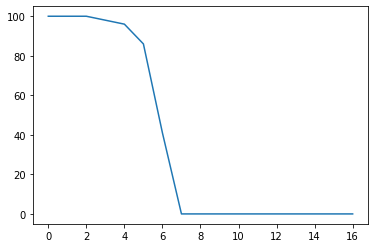

In [151]:
v = get_sat_vec(df, 500)
plt.plot(v)
sum(v)

In [152]:
def plot_results(N):
    satvec = get_sat_vec(df, N)
    nodevec = get_node_vec(df, N)
    
    fig, axs = plt.subplots(2, sharex=True)
    fig.tight_layout()
    
    axs[0].plot(p_occs, satvec)
    axs[0].set_title("Number of Satisfiable Mazes (N={})".format(N))
    axs[0].set_ylabel('Satisfied Mazes (/100)')
    
    axs[1].plot(p_occs, nodevec, 'r')
    axs[1].set_title("Number of Nodes Explored (N={})".format(N))
    axs[1].set_ylabel('Num Nodes')
    
    plt.xlabel('p_occ')
#     plt.gcf().subplots_adjust(bottom=0.15)
#     plt.gcf().subplots_adjust(left=0.15)
#     plt.gcf().subplots_adjust(right=1.15)
#     plt.gcf().subplots_adjust(top=0.15)
    plt.tight_layout()
    plt.savefig('figures/{}.jpg'.format(N), dpi=300)
    plt.show()

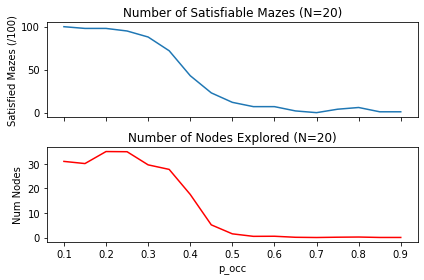

In [153]:
plot_results(20)

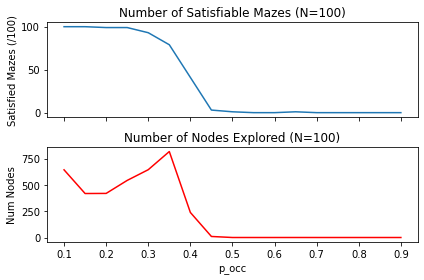

In [154]:
plot_results(100)

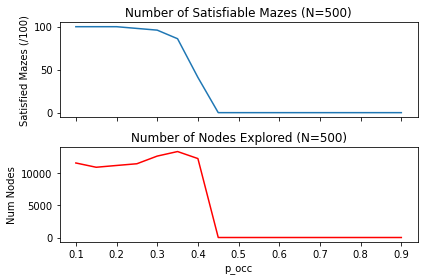

In [155]:
plot_results(500)